In [84]:
# Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [85]:
# Mendefinisikan path dataset
path = 'D:\Perkuliahan\SEMESTER_6\Bengkod\Capstone_Bengkod_DS01\Dataset\ObesityDataSet.csv'

# Membaca dataset dengan menangani missing values
df = pd.read_csv(path, na_values=' ?')

## EDA

In [86]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [87]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

## Preprocessing

### Menangani Missing Value

In [89]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                              

### Distribusi Target

In [90]:
# Distribusi target variable
df['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

### Mengubah Nilai Kategorikal Menjadi Numerik

In [91]:
# Periksa range nilai untuk kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns # Selects columns with numeric data types

for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Kategori unik dalam Age:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kategori unik dalam Gender:
['Female' 'Male' '?']

Kategori unik dalam Height:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kategori unik dalam Weight:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' '?' 'Always']

Kategori unik dalam FAVC:
['no' 'yes' '?']

Kategori unik dalam FCVC:
['2' '3' '1' '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'
 '1.21498' '1.522001' '2.703436' '2.362918' '2.14084' '2.5596' '2.336044'


In [92]:
# Menangani nilai '?' untuk setiap kolom
for column in df.columns:
    if df[column].dtype == 'object':  # Hanya untuk kolom kategorikal
        # Mengganti nilai '?' dengan mode (nilai yang paling sering muncul)
        mode_value = df[column].mode()[0]
        df[column] = df[column].replace('?', mode_value)

# Verifikasi hasil
print("Memeriksa nilai unik setiap kolom kategorikal setelah pembersihan:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())

Memeriksa nilai unik setiap kolom kategorikal setelah pembersihan:

Kategori unik dalam Age:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kategori unik dalam Gender:
['Female' 'Male']

Kategori unik dalam Height:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kategori unik dalam Weight:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' 'Always']

Kategori unik dalam FAVC:
['no' 'yes']

Kategori unik dalam FCVC:
['2' '3' '1' '8.148992744163786' '8.42397392777979' '2.450218' '2.880161'
 '2.00876' '2.596579' '2.591439' '2.392665' '1.123939' '2.027574'
 '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439' '2.059138'
 '2.310423' '2.823179' '2.052932' '2.596364' '2.767731' '2.815157'
 '2.737762' '2.524428' '2.971574' '1.0816' '1.270448' '1.344854'
 '2.959658' '2.725282' '2.844607' '2.44004' '2.432302' '2.592247'
 '2.449267' '2.929889' '2.015258' '1.031149' '1.592183' '1.21498'
 '1.522001' '

In [ ]:
# Kolom kategorikal yang akan diubah ke numerik
kolom_untuk_diubah = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 
                      'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

# Buat kamus untuk menyimpan mapping
mapping = {}

# Ulangi untuk setiap kolom yang akan diubah
for kolom in kolom_untuk_diubah:
    # Dapatkan kategori unik untuk kolom saat ini
    kategori_unik = df[kolom].unique()
    
    # Buat mapping untuk kolom saat ini
    mapping_kolom = {kategori: i for i, kategori in enumerate(sorted(kategori_unik))}
    
    # Simpan mapping dalam kamus
    mapping[kolom] = mapping_kolom

# Cetak mapping untuk setiap kolom
for kolom, mapping_kolom in mapping.items():
    print(f"mapping untuk kolom '{kolom}':")
    print(mapping_kolom)
    print()

# Ganti kategori dalam dataframe
df_encoded = df.copy()
for kolom, mapping_kolom in mapping.items():
    df_encoded[kolom] = df_encoded[kolom].map(mapping_kolom)

print("5 baris pertama setelah pengkodean:")
print(df_encoded[kolom_untuk_diubah].head())

mapping untuk kolom 'Gender':
{'Female': 0, 'Male': 1}

mapping untuk kolom 'CALC':
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}

mapping untuk kolom 'FAVC':
{'no': 0, 'yes': 1}

mapping untuk kolom 'SCC':
{'no': 0, 'yes': 1}

mapping untuk kolom 'SMOKE':
{'no': 0, 'yes': 1}

mapping untuk kolom 'family_history_with_overweight':
{'no': 0, 'yes': 1}

mapping untuk kolom 'CAEC':
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}

mapping untuk kolom 'MTRANS':
{'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}

mapping untuk kolom 'NObeyesdad':
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}

5 baris pertama setelah pengkodean:
   Gender  CALC  FAVC  SCC  SMOKE  family_history_with_overweight  CAEC  \
0       0     3     0    0      0                               1     2   
1       0     2     0    1      1                

### Menangani Duplikat

In [94]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 20


In [95]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2091


### Menangani Outlier

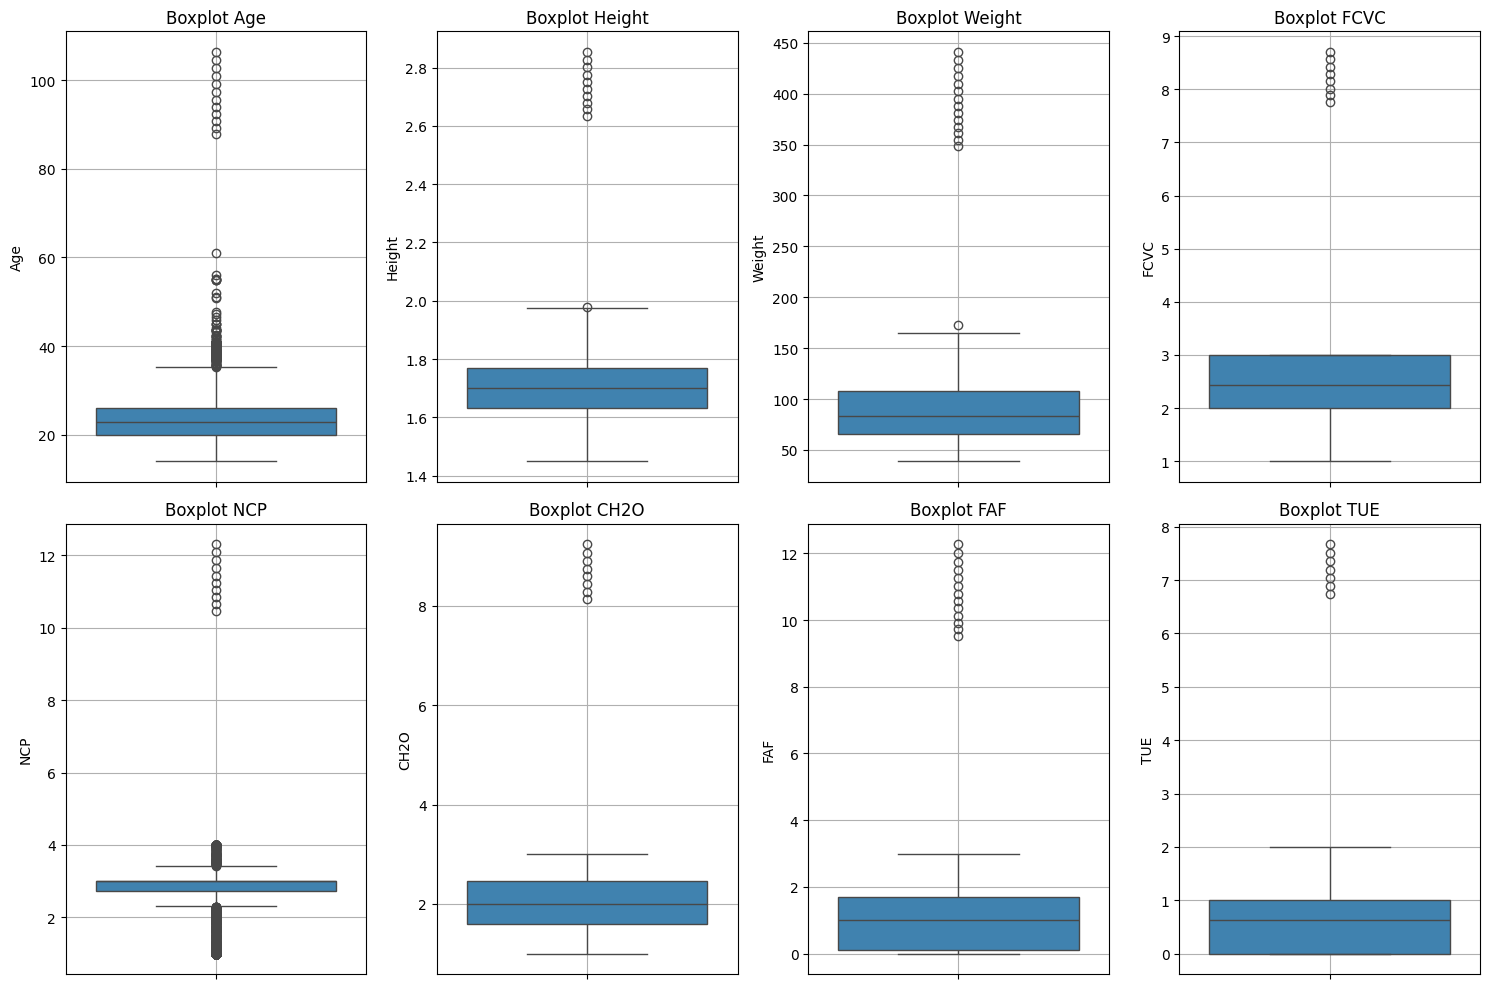


Outlier pada Age:
Jumlah outlier: 176
Persentase outlier: 8.42%
Batas bawah: 10.52
Batas atas: 35.29

Outlier pada Height:
Jumlah outlier: 11
Persentase outlier: 0.53%
Batas bawah: 1.42
Batas atas: 1.98

Outlier pada Weight:
Jumlah outlier: 15
Persentase outlier: 0.72%
Batas bawah: 2.90
Batas atas: 171.17

Outlier pada FCVC:
Jumlah outlier: 8
Persentase outlier: 0.38%
Batas bawah: 0.50
Batas atas: 4.50

Outlier pada NCP:
Jumlah outlier: 599
Persentase outlier: 28.65%
Batas bawah: 2.31
Batas atas: 3.42

Outlier pada CH2O:
Jumlah outlier: 8
Persentase outlier: 0.38%
Batas bawah: 0.29
Batas atas: 3.76

Outlier pada FAF:
Jumlah outlier: 13
Persentase outlier: 0.62%
Batas bawah: -2.25
Batas atas: 4.04

Outlier pada TUE:
Jumlah outlier: 7
Persentase outlier: 0.33%
Batas bawah: -1.50
Batas atas: 2.50


In [96]:
# Mengkonversi kolom numerik ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Membuat boxplot untuk kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, color='#2E86C1')
    plt.title(f'Boxplot {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Menghitung dan menampilkan statistik outlier
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)][col]
    
    print(f"\nOutlier pada {col}:")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Batas bawah: {batas_bawah:.2f}")
    print(f"Batas atas: {batas_atas:.2f}")

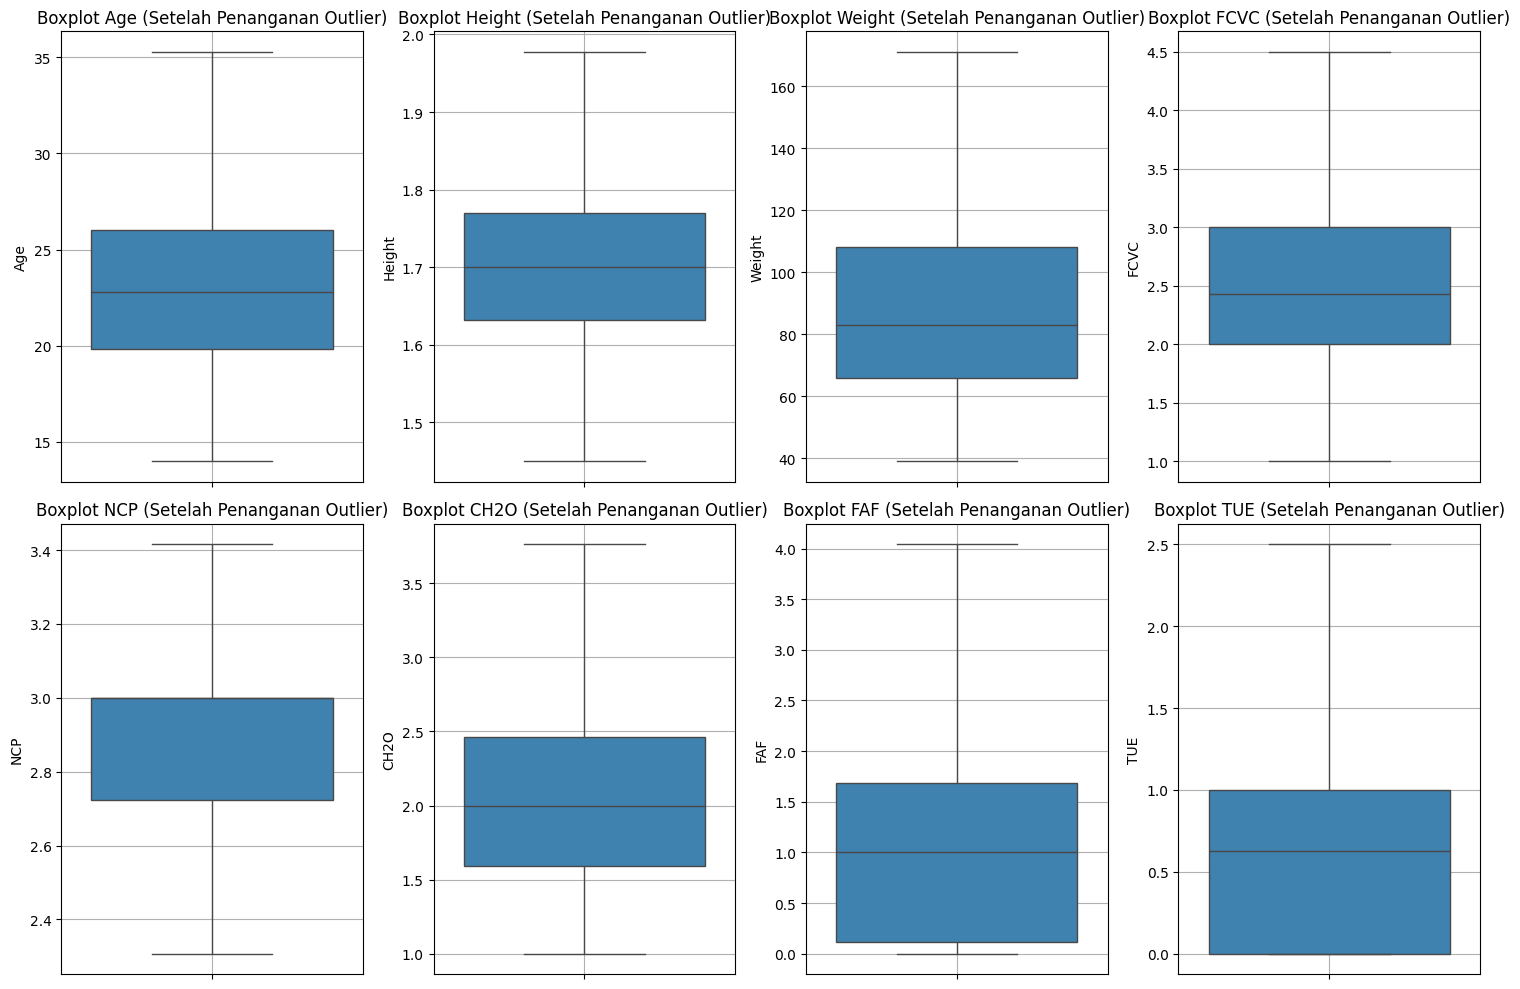

In [97]:
# Fungsi untuk menangani outlier menggunakan metode IQR dengan pembatasan
def tangani_outlier(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Membatasi nilai outlier
    df[kolom] = df[kolom].clip(lower=batas_bawah, upper=batas_atas)
    
    return df

# Menangani outlier untuk setiap kolom numerik
for col in numeric_cols:
    df = tangani_outlier(df, col)

# Membuat boxplot setelah penanganan outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, color='#2E86C1')
    plt.title(f'Boxplot {col} (Setelah Penanganan Outlier)')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Menangani Data Imbalance 

In [98]:
# Label encoding untuk variabel kategorikal
le = LabelEncoder()
df_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Memisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Membuat dataframe baru yang sudah seimbang
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['NObeyesdad'] = y_balanced


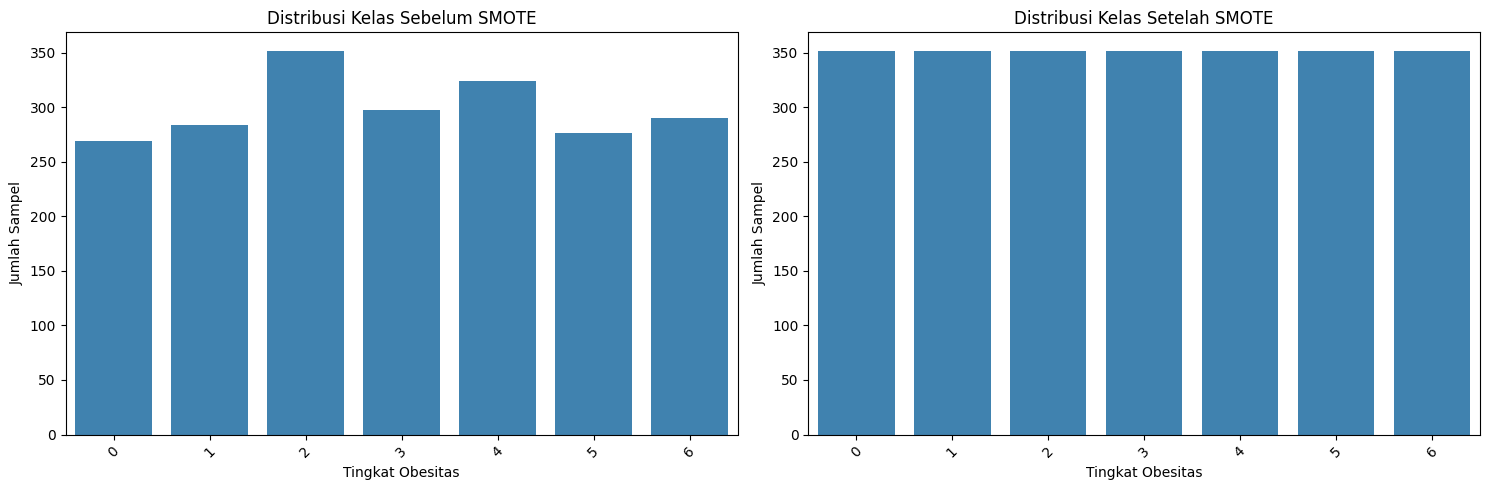


Perbandingan Distribusi Kelas (dalam %):
            Sebelum SMOTE  Setelah SMOTE
NObeyesdad                              
0                    12.9           14.3
1                    13.6           14.3
2                    16.8           14.3
3                    14.2           14.3
4                    15.5           14.3
5                    13.2           14.3
6                    13.9           14.3


In [99]:
# Membuat figure dengan subplot untuk visualisasi distribusi kelas
plt.figure(figsize=(15, 5))

# Plot distribusi kelas sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, color='#2E86C1')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Plot distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced, color='#2E86C1')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

# Menampilkan perbandingan dalam bentuk tabel
comparison = pd.DataFrame({
    'Sebelum SMOTE': y.value_counts(normalize=True),
    'Setelah SMOTE': y_balanced.value_counts(normalize=True)
}).round(3) * 100

print("\nPerbandingan Distribusi Kelas (dalam %):")
print(comparison)

### Normalisasi Fitur Numerik

In [100]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi fitur numerik menggunakan Min-Max Scaler (penskalaan ke range 0-1)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# List kolom numerik yang akan dinormalisasi 
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Lakukan normalisasi pada data asli
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

# Tampilkan hasil normalisasi untuk 5 data pertama
print("Hasil normalisasi 5 data pertama:")
print(df[kolom_numerik].head())

# Tampilkan statistik deskriptif setelah normalisasi
print("\nStatistik deskriptif setelah normalisasi:")
print(df[kolom_numerik].describe())

Hasil normalisasi 5 data pertama:
        Age    Height    Weight      FCVC    NCP      CH2O       FAF  TUE
0  0.328815  0.322218  0.189153  0.285714  0.625  0.361868  0.000000  0.4
1  0.328815  0.132678  0.128624  0.571429  0.625  0.723737  0.742196  0.0
2  0.422763  0.663390  0.287513  0.285714  0.625  0.361868  0.494797  0.4
3  0.610657  0.663390  0.363174  0.571429  0.625  0.361868  0.494797  0.0
4  0.375789  0.625482  0.384360  0.285714  0.000  0.361868  0.000000  0.0

Statistik deskriptif setelah normalisasi:
               Age       Height       Weight         FCVC          NCP  \
count  2091.000000  2091.000000  2091.000000  2091.000000  2091.000000   
mean      0.467243     0.480865     0.365210     0.410534     0.509287   
std       0.253105     0.179324     0.203158     0.157022     0.297464   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.272806     0.344213     0.204286     0.285714     0.375000   
50%       0.413594     0.475038    

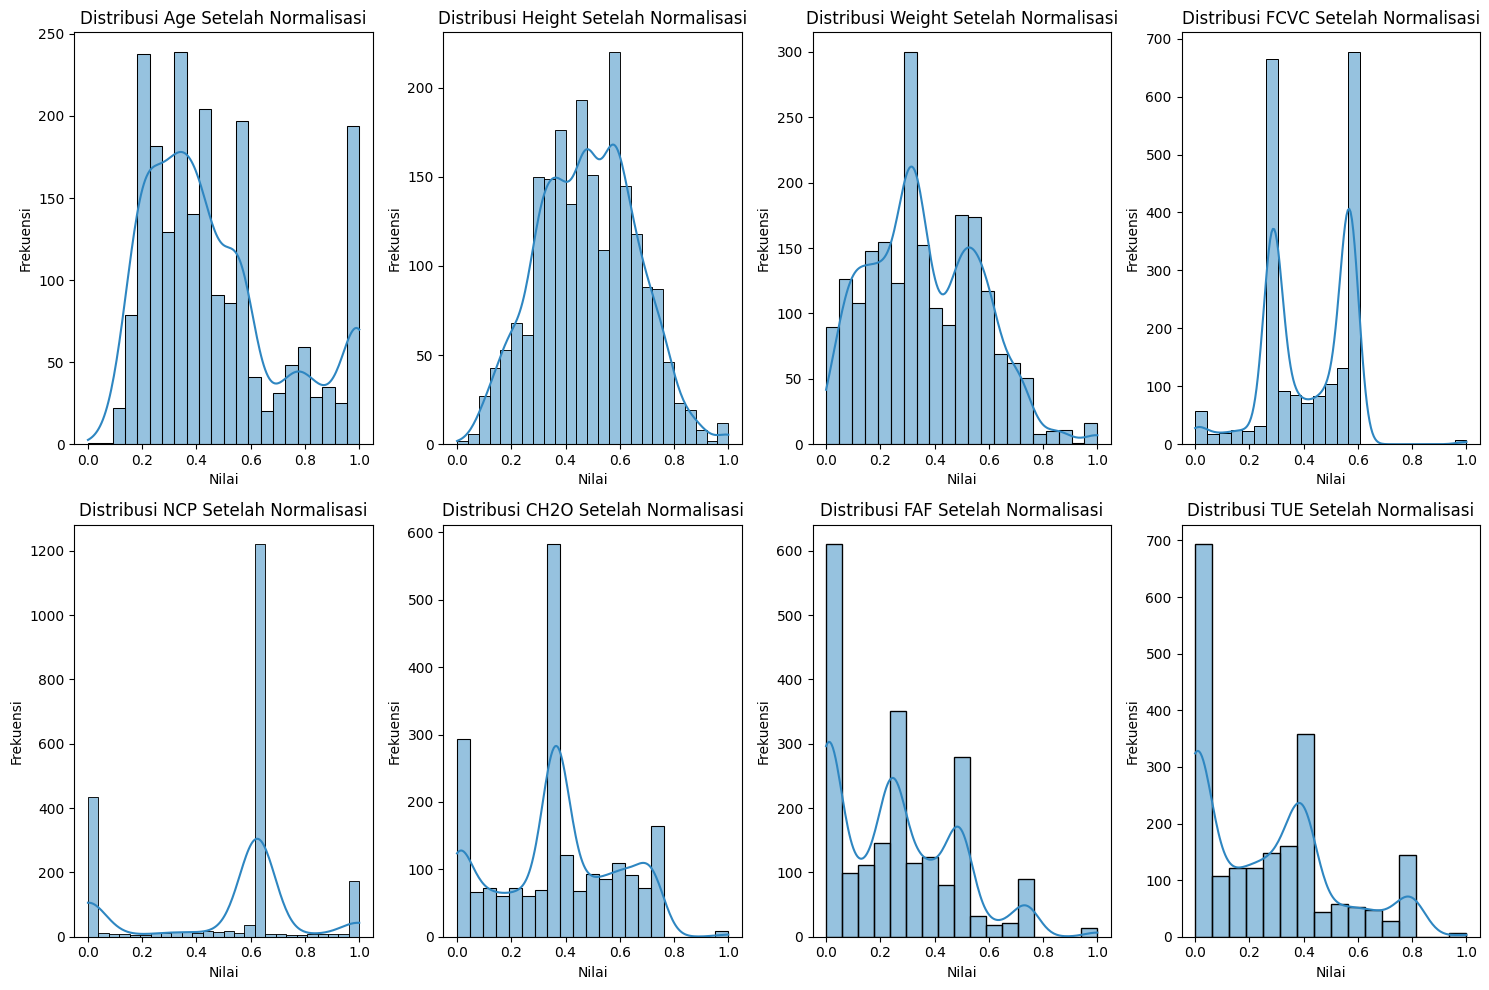

In [101]:
# Membuat visualisasi distribusi fitur setelah normalisasi
plt.figure(figsize=(15, 10))

# Mengatur warna yang konsisten
color = '#2E86C1'

# Membuat subplot untuk setiap kolom numerik
for i, col in enumerate(kolom_numerik, 1):
    plt.subplot(2, 4, i)
    
    # Membuat histogram dengan KDE
    sns.histplot(data=df, x=col, color=color, kde=True)
    
    plt.title(f'Distribusi {col} Setelah Normalisasi')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    
# Mengatur tata letak
plt.tight_layout()
plt.show()

### Korelasi Heatmap

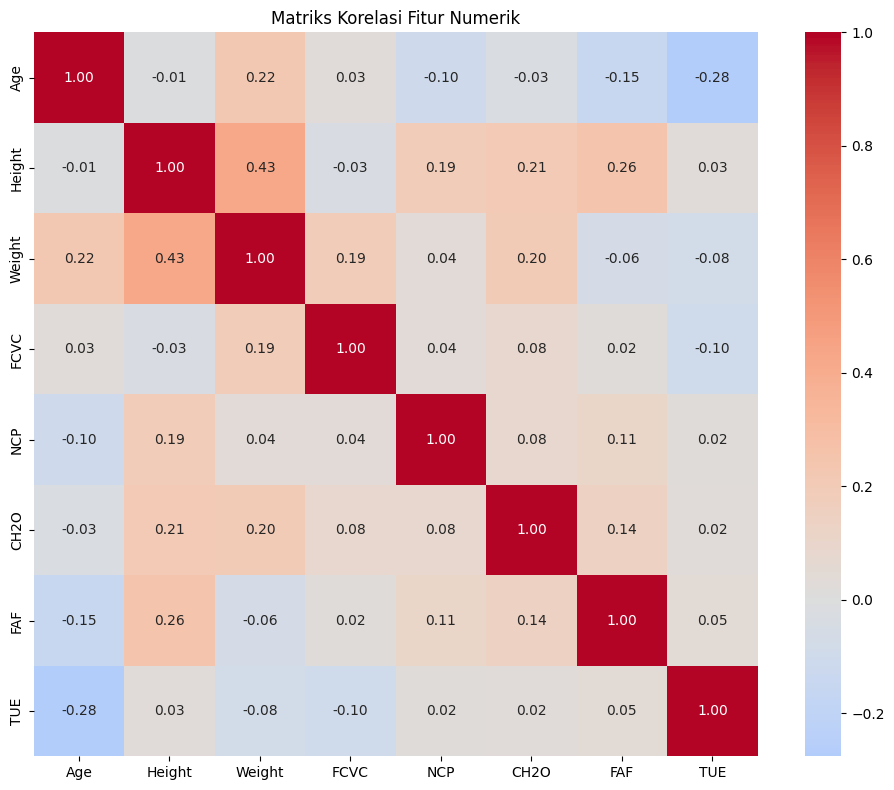

In [102]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df[kolom_numerik].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

## Modeling

In [103]:
# Import libraries untuk Random Forest modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import pickle
warnings.filterwarnings('ignore')

### Random Forest

In [104]:
#  PERSIAPAN DATA UNTUK RANDOM FOREST

# Menggunakan data yang sudah dibalance dengan SMOTE
X = df_balanced.drop('NObeyesdad', axis=1)
y = df_balanced['NObeyesdad']

print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Distribusi kelas target:\n{y.value_counts()}")

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

Jumlah sampel: 2457
Jumlah fitur: 16
Distribusi kelas target:
NObeyesdad
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64

Data training: 1965 sampel
Data testing: 492 sampel


In [105]:
# RANDOM FOREST MODEL

# Inisialisasi model Random Forest
start_time = time.time()
model_rf = RandomForestClassifier(random_state=42)

# Latih model
model_rf.fit(X_train, y_train)

end_time = time.time()
training_time_rf = end_time - start_time

print(f"Waktu pelatihan Random Forest: {training_time_rf:.4f} detik")

Waktu pelatihan Random Forest: 0.3036 detik


### Evaluasi Model

In [106]:
# EVALUASI MODEL

# Prediksi pada data testing
start_time = time.time()
y_pred = model_rf.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Hitung berbagai metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("PERFORMA MODEL RANDOM FOREST:")
print("-" * 50)
print(f"Akurasi     : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1-Score    : {f1:.4f}")

target_names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

print(classification_report(y_test, y_pred, target_names=target_names))

PERFORMA MODEL RANDOM FOREST:
--------------------------------------------------
Akurasi     : 0.9451
Precision   : 0.9457
Recall      : 0.9451
F1-Score    : 0.9453
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.97      0.98        70
      Normal_Weight       0.86      0.90      0.88        70
 Overweight_Level_I       0.99      0.99      0.99        70
Overweight_Level_II       1.00      0.97      0.99        71
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       0.90      0.89      0.89        70
   Obesity_Type_III       0.91      0.90      0.91        71

           accuracy                           0.95       492
          macro avg       0.95      0.95      0.95       492
       weighted avg       0.95      0.95      0.95       492



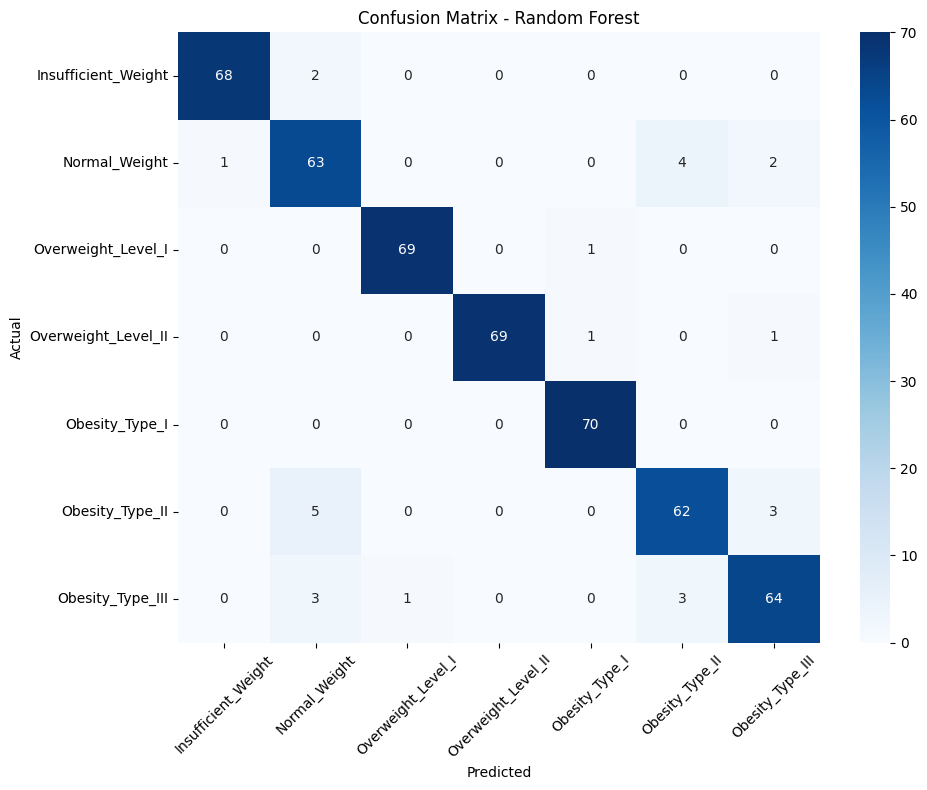

In [107]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Feature Importance

Feature Importance (Top 10):
----------------------------------------
 1. Weight              : 0.3439
 2. Height              : 0.1052
 3. Age                 : 0.0888
 4. FCVC                : 0.0874
 5. Gender              : 0.0582
 6. NCP                 : 0.0466
 7. FAF                 : 0.0457
 8. TUE                 : 0.0442
 9. CH2O                : 0.0415
10. family_history_with_overweight: 0.0338


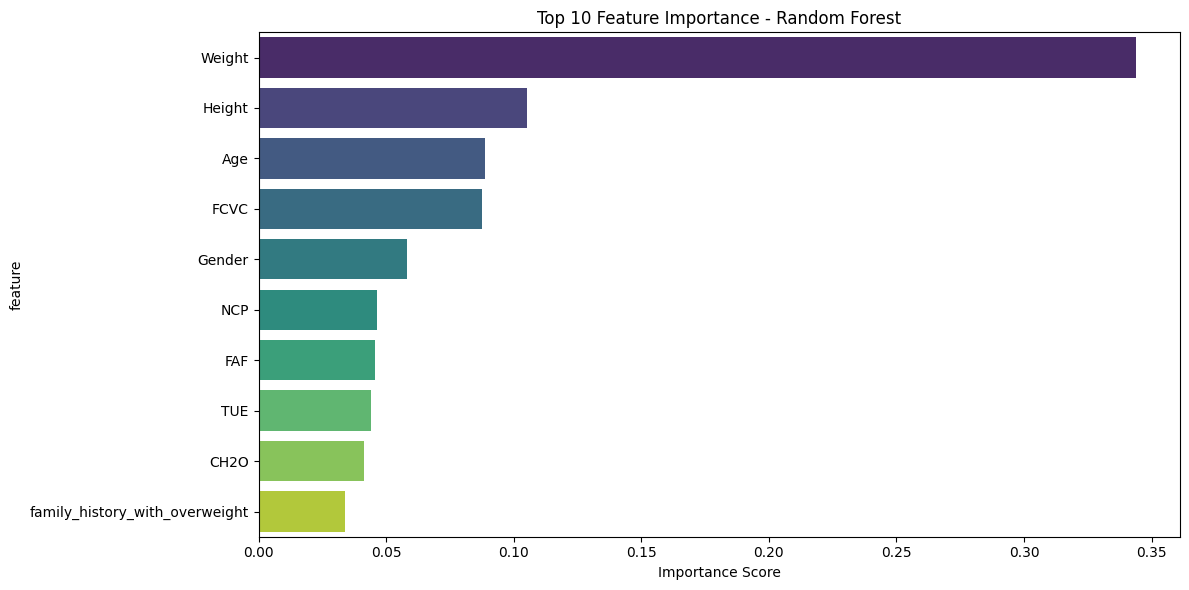

In [108]:
# Feature importance dari Random Forest
feature_importance = model_rf.feature_importances_
feature_names = X.columns

# Buat DataFrame untuk sorting
import pandas as pd
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Feature Importance (Top 10):")
print("-" * 40)
for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:20s}: {row['importance']:.4f}")

# Visualisasi Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [109]:
# Simpan model
model_filename = 'random_forest_obesity_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_rf, file)

# Simpan feature names untuk konsistensi
feature_filename = 'feature_names.pkl'
with open(feature_filename, 'wb') as file:
    pickle.dump(list(X.columns), file)

print(f"Model Random Forest disimpan sebagai: {model_filename}")
print(f"Feature names disimpan sebagai: {feature_filename}")

Model Random Forest disimpan sebagai: random_forest_obesity_model.pkl
Feature names disimpan sebagai: feature_names.pkl


## Prediksi

In [112]:
def predict_obesity(age, gender, height, weight, calc, favc, fcvc, ncp, scc, smoke, 
                   ch2o, family_history, faf, tue, caec, mtrans):
    
    # Buat array input
    input_data = np.array([[age, gender, height, weight, calc, favc, fcvc, ncp, scc, smoke,
                           ch2o, family_history, faf, tue, caec, mtrans]])
    
    # Prediksi
    prediction = model_rf.predict(input_data)[0]
    prediction_proba = model_rf.predict_proba(input_data)[0]
    confidence = np.max(prediction_proba)
    
    # Mapping hasil prediksi ke label
    labels = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I',
              3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}
    
    return labels[prediction], confidence

Fungsi untuk memprediksi tingkat obesitas menggunakan Random Forest
    
  Parameters:
  - age: Umur
  - gender: Jenis kelamin (0: Female, 1: Male)
  - height: Tinggi badan (meter)
  - weight: Berat badan (kg)
  - calc: Konsumsi alkohol (0: no, 1: Sometimes, 2: Frequently, 3: Always)
  - favc: Konsumsi makanan berkalori tinggi (0: no, 1: yes)
  - fcvc: Konsumsi sayuran (1-3)
  - ncp: Jumlah makanan utama (1-4)
  - scc: Monitor kalori (0: no, 1: yes)
  - smoke: Merokok (0: no, 1: yes)
  - ch2o: Konsumsi air (1-3)
  - family_history: Riwayat keluarga overweight (0: no, 1: yes)
  - faf: Aktivitas fisik (0-3)
  - tue: Waktu menggunakan teknologi (0-2)
  - caec: Konsumsi makanan antar waktu makan (0: no, 1: Sometimes, 2: Frequently, 3: Always)
  - mtrans: Transportasi (0: Automobile, 1: Bike, 2: Motorbike, 3: Public_Transportation, 4: Walking)
  
  Returns:
  - Prediksi tingkat obesitas

In [111]:
# Contoh prediksi 1
prediction1, confidence1 = predict_obesity(
    age=25, gender=1, height=1.75, weight=70, calc=1, favc=0, fcvc=2, ncp=3,
    scc=0, smoke=0, ch2o=2, family_history=0, faf=2, tue=1, caec=1, mtrans=3
)

print("Contoh 1:")
print(f"Prediksi: {prediction1}")
print(f"Confidence: {confidence1:.3f}")

# Contoh prediksi 2
prediction2, confidence2 = predict_obesity(
    age=35, gender=1, height=1.70, weight=75, calc=2, favc=1, fcvc=0, ncp=4,
    scc=0, smoke=1, ch2o=1, family_history=1, faf=0, tue=2, caec=3, mtrans=0
)

print(f"\nContoh 2:")
print(f"Prediksi: {prediction2}")
print(f"Confidence: {confidence2:.3f}")

Contoh 1:
Prediksi: Normal_Weight
Confidence: 0.880

Contoh 2:
Prediksi: Obesity_Type_II
Confidence: 0.540
